In [5]:
#Make sure to run this code in order to have the libraries needed

from IPython.display import display
import json
import pandas as pd
pd.options.display.max_columns = None 
pd.options.display.max_rows = 700
from pprint import pprint
import time
import os
from selenium import webdriver
import re
import requests
from bs4 import BeautifulSoup
from selenium.webdriver.chrome.service import Service


In [13]:
chromedriver_path = 'path/to/chromedriver'

service = Service(executable_path=chromedriver_path)
driver = webdriver.Chrome(service=service)
restaurants_infos = []
url = "https://www.trouvetonresto.be/restaurant/bruxelles?page=1"

try:
    driver.get(url)
    time.sleep(5)

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    restaurants = soup.find('div', class_='col-md-8 col-sm-7 list-content').find('div', class_='list-restaurant').find_all('div', class_='col-md-6 list-item')

    for restaurant in restaurants:
        restaurant_url = restaurant.find('a')['href']
        driver.get(restaurant_url)
        time.sleep(2)
        soup = BeautifulSoup(driver.page_source, 'html.parser')

        try:
            restaurant_name = soup.find('div', class_='fiche-header-name').find('h1').text.strip()
        except:
            restaurant_name = "Not available"

        try:
            input_element = soup.find(id="input-rating-header")
            rating_value = input_element['value']
        except:
            rating_value = "Not available"

        try:
            restaurant_type = soup.find('div', class_='fiche-header-tags').find('strong').text.strip()
        except:
            restaurant_type = "Not available"

        try:
            restaurant_address = soup.find('div', class_='sidebar-address sidebar-item').find('address').text.strip().split('\n')
        except:
            restaurant_address = "Not available"
            
        try:
            div_element = soup.find('div', class_='sidebar-budget sidebar-item tooltip-blue-green')
            span_element = div_element.find('span', class_='price')
            budget_moyen = span_element.text.strip()
        except:
            budget_moyen = "Not Available"

        try:
            capacite_title = soup.find('div', class_='moreInfo-title', text="Capacité maximum")
            capacite_max = capacite_title.find_next_sibling('div', class_='moreinfo-value').text.strip()
        except:
            capacite_max = "Not Available"

        restaurants_infos.append({
            'Name': restaurant_name,
            'Rating': rating_value,
            'Type': restaurant_type,
            'Address': restaurant_address,
            'Average budget': budget_moyen,
            'Maximum capacity': capacite_max
                
        })


        if len(restaurants_infos) >= 500:
            break

except Exception as e:
    print(f"Error occurred: {str(e)}")

finally:
    driver.quit()

# Creation of a DataFrame from the scraped information
df = pd.DataFrame(restaurants_infos)

df = df.replace('Not Available', 'Not available')

# Print the DataFrame
pd.set_option('display.max_columns', None)  
print(df)


                                   Name           Rating           Type  \
0                L'Atelier d'Alessandro                5        Italien   
1                             Per Bacco    Not available        Italien   
2                       Fresh And Tasty    Not available           Grec   
3                         Le Lion Belge             4.75          Belge   
4                         Madou's Folie                5          Belge   
5                        Core Bruxelles                5       Européen   
6                          De Hoef 1627                5       Français   
7                          Le Coriandre                5       Français   
8                     Le Jules d'Emilie                5       Français   
9                      Au Cor De Chasse                5      Brésilien   
10                         Le Transvaal                5       Français   
11                              Lebanon                5       Libanais   
12                       

In [14]:
# Convert DataFrame to CSV
df.to_csv('outputT.csv', index=False) 

In [18]:
#Webscraping of the website second page 

chromedriver_path = 'path/to/chromedriver'
service = Service(executable_path=chromedriver_path)
driver = webdriver.Chrome(service=service)
restaurants_infos = []
url = "https://www.trouvetonresto.be/restaurant/bruxelles?page=2"  # Start from the 2nd page

try:
    
    driver.get(url)
    time.sleep(5)

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    restaurants = soup.find('div', class_='col-md-8 col-sm-7 list-content').find('div', class_='list-restaurant').find_all('div', class_='col-md-6 list-item')

    for restaurant in restaurants:
        restaurant_url = restaurant.find('a')['href']
        driver.get(restaurant_url)
        time.sleep(2)
        soup = BeautifulSoup(driver.page_source, 'html.parser')

        # Extract restaurant information here
        try:
            restaurant_name = soup.find('div', class_='fiche-header-name').find('h1').text.strip()
        except:
            restaurant_name = "Not available"

        try:
            input_element = soup.find(id="input-rating-header")
            rating_value = input_element['value']
        except:
            rating_value = "Not available"

        try:
            restaurant_type = soup.find('div', class_='fiche-header-tags').find('strong').text.strip()
        except:
            restaurant_type = "Not available"

        try:
            restaurant_address = soup.find('div', class_='sidebar-address sidebar-item').find('address').text.strip().split('\n')
        except:
            restaurant_address = "Not available"
            
        try:
            div_element = soup.find('div', class_='sidebar-budget sidebar-item tooltip-blue-green')
            span_element = div_element.find('span', class_='price')
            budget_moyen = span_element.text.strip()
        except:
            budget_moyen = "Not Available"

        try:
            capacite_title = soup.find('div', class_='moreInfo-title', text="Capacité maximum")
            capacite_max = capacite_title.find_next_sibling('div', class_='moreinfo-value').text.strip()
        except:
            capacite_max = "Not Available"

        restaurants_infos.append({
            'Name': restaurant_name,
            'Rating': rating_value,
            'Type': restaurant_type,
            'Address': restaurant_address,
            'Average budget': budget_moyen,
            'Maximum capacity': capacite_max
                
        })


except Exception as e:
    print(f"Error occurred: {str(e)}")

finally:
    driver.quit()

# Convert the list of restaurant information into a DataFrame
df2 = pd.DataFrame(restaurants_infos)

# Print the DataFrame
print(df2)


                             Name           Rating         Type  \
0                      Yama Sushi              4.5     Japonais   
1                  Saveurs d'Asie              4.5      Chinois   
2           Le Chalet De La Forêt             4.25     Français   
3                      La Buvette              4.3     Français   
4                      Fanny Thai             4.25  Thaïlandais   
5                         Brinz'L  4.1666666666667     Français   
6                             Gou  4.1666666666667     Français   
7                           Anata            4.125     Japonais   
8                       La Cigale                4     Français   
9            Un Goût De Chez Nous                4        Belge   
10                  Vert De Rouge                4    Asiatique   
11                     Chez Bruno                4      Italien   
12                     La Cantina                4    Brésilien   
13                     Le Dillens                4     Europée

In [20]:
# Convert DataFrame to CSV
df2.to_csv('output.csv', index=False) 

In [21]:
#Webscraping of the website third page 

chromedriver_path = 'path/to/chromedriver'
service = Service(executable_path=chromedriver_path)
driver = webdriver.Chrome(service=service)
restaurants_infos = []
url = "https://www.trouvetonresto.be/restaurant/bruxelles?page=3"  # Start from the 3rd page

try:
    driver.get(url)
    time.sleep(5)

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    restaurants = soup.find('div', class_='col-md-8 col-sm-7 list-content').find('div', class_='list-restaurant').find_all('div', class_='col-md-6 list-item')

    for restaurant in restaurants:
        restaurant_url = restaurant.find('a')['href']
        driver.get(restaurant_url)
        time.sleep(2)
        soup = BeautifulSoup(driver.page_source, 'html.parser')

        # Extract restaurant information here
        try:
            restaurant_name = soup.find('div', class_='fiche-header-name').find('h1').text.strip()
        except:
            restaurant_name = "Not available"

        try:
            input_element = soup.find(id="input-rating-header")
            rating_value = input_element['value']
        except:
            rating_value = "Not available"

        try:
            restaurant_type = soup.find('div', class_='fiche-header-tags').find('strong').text.strip()
        except:
            restaurant_type = "Not available"

        try:
            restaurant_address = soup.find('div', class_='sidebar-address sidebar-item').find('address').text.strip().split('\n')
        except:
            restaurant_address = "Not available"
            
        try:
            div_element = soup.find('div', class_='sidebar-budget sidebar-item tooltip-blue-green')
            span_element = div_element.find('span', class_='price')
            budget_moyen = span_element.text.strip()
        except:
            budget_moyen = "Not Available"

        try:
            capacite_title = soup.find('div', class_='moreInfo-title', text="Capacité maximum")
            capacite_max = capacite_title.find_next_sibling('div', class_='moreinfo-value').text.strip()
        except:
            capacite_max = "Not Available"

        restaurants_infos.append({
            'Name': restaurant_name,
            'Rating': rating_value,
            'Type': restaurant_type,
            'Address': restaurant_address,
            'Average budget': budget_moyen,
            'Maximum capacity': capacite_max
                
        })


except Exception as e:
    print(f"Error occurred: {str(e)}")

finally:
    driver.quit()

# Convert the list of restaurant information into a DataFrame
df3 = pd.DataFrame(restaurants_infos)

# Print the DataFrame
print(df3)


                                       Name           Rating           Type  \
0                                    Kabuki  3.3333333333333       Japonais   
1                                Pizza Saco                3        Italien   
2                                    Makisu                3       Français   
3                                 Meli Mêly                3         Coréen   
4                            Brussels Grill                3       Français   
5                                   Oficina                3       Français   
6                                Drug Opéra                3          Belge   
7                              Midi Station                3          Belge   
8   Bam's Resto Bistro, Watermael-boitsfort             2.25       Français   
9                           Jardin De Pékin                2        Chinois   
10                               Mcdonald's                2      Américain   
11                               Il Vespino         

In [22]:
# Convert DataFrame to CSV
df3.to_csv('output3.csv', index=False) 

In [25]:
#Webscraping of the website fourth page

chromedriver_path = 'path/to/chromedriver'
service = Service(executable_path=chromedriver_path)
driver = webdriver.Chrome(service=service)
restaurants_infos = []
url = "https://www.trouvetonresto.be/restaurant/bruxelles?page=4"  # Start from the 4th page

try:
    driver.get(url)
    time.sleep(5)

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    restaurants = soup.find('div', class_='col-md-8 col-sm-7 list-content').find('div', class_='list-restaurant').find_all('div', class_='col-md-6 list-item')

    for restaurant in restaurants:
        restaurant_url = restaurant.find('a')['href']
        driver.get(restaurant_url)
        time.sleep(2)
        soup = BeautifulSoup(driver.page_source, 'html.parser')

        # Extract restaurant information here
        try:
            restaurant_name = soup.find('div', class_='fiche-header-name').find('h1').text.strip()
        except:
            restaurant_name = "Not available"

        try:
            input_element = soup.find(id="input-rating-header")
            rating_value = input_element['value']
        except:
            rating_value = "Not available"

        try:
            restaurant_type = soup.find('div', class_='fiche-header-tags').find('strong').text.strip()
        except:
            restaurant_type = "Not available"

        try:
            restaurant_address = soup.find('div', class_='sidebar-address sidebar-item').find('address').text.strip().split('\n')
        except:
            restaurant_address = "Not available"
            
        try:
            div_element = soup.find('div', class_='sidebar-budget sidebar-item tooltip-blue-green')
            span_element = div_element.find('span', class_='price')
            budget_moyen = span_element.text.strip()
        except:
            budget_moyen = "Not Available"

        try:
            capacite_title = soup.find('div', class_='moreInfo-title', text="Capacité maximum")
            capacite_max = capacite_title.find_next_sibling('div', class_='moreinfo-value').text.strip()
        except:
            capacite_max = "Not Available"

        restaurants_infos.append({
            'Name': restaurant_name,
            'Rating': rating_value,
            'Type': restaurant_type,
            'Address': restaurant_address,
            'Average budget': budget_moyen,
            'Maximum capacity': capacite_max
                
        })


except Exception as e:
    print(f"Error occurred: {str(e)}")

finally:
    driver.quit()

# Convert the list of restaurant information into a DataFrame
df4 = pd.DataFrame(restaurants_infos)

# Print the DataFrame
print(df4)


Error occurred: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=114.0.5735.90)
Stacktrace:
Backtrace:
	GetHandleVerifier [0x002DA813+48355]
	(No symbol) [0x0026C4B1]
	(No symbol) [0x00175358]
	(No symbol) [0x0015D293]
	(No symbol) [0x001BE37B]
	(No symbol) [0x001CC473]
	(No symbol) [0x001BA536]
	(No symbol) [0x001982DC]
	(No symbol) [0x001993DD]
	GetHandleVerifier [0x0053AABD+2539405]
	GetHandleVerifier [0x0057A78F+2800735]
	GetHandleVerifier [0x0057456C+2775612]
	GetHandleVerifier [0x003651E0+616112]
	(No symbol) [0x00275F8C]
	(No symbol) [0x00272328]
	(No symbol) [0x0027240B]
	(No symbol) [0x00264FF7]
	BaseThreadInitThunk [0x75757D59+25]
	RtlInitializeExceptionChain [0x7792B74B+107]
	RtlClearBits [0x7792B6CF+191]
	(No symbol) [0x00000000]

               Name         Rating     Type  \
0  Jules Et Charles  Not available  Italien   

                                             Address Average budget  \
0  [Avenue Ch

In [26]:
# Convert DataFrame to CSV
df4.to_csv('output4.csv', index=False) 

In [27]:
#Webscraping of the website fifth page 

chromedriver_path = 'path/to/chromedriver'
service = Service(executable_path=chromedriver_path)
driver = webdriver.Chrome(service=service)
restaurants_infos = []
url = "https://www.trouvetonresto.be/restaurant/bruxelles?page=5"  # Start from the 5th page

try:
    # Open the URL
    driver.get(url)
    time.sleep(5)

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    restaurants = soup.find('div', class_='col-md-8 col-sm-7 list-content').find('div', class_='list-restaurant').find_all('div', class_='col-md-6 list-item')

    for restaurant in restaurants:
        restaurant_url = restaurant.find('a')['href']
        driver.get(restaurant_url)
        time.sleep(2)
        soup = BeautifulSoup(driver.page_source, 'html.parser')

        # Extract restaurant information here
        try:
            restaurant_name = soup.find('div', class_='fiche-header-name').find('h1').text.strip()
        except:
            restaurant_name = "Not available"

        try:
            input_element = soup.find(id="input-rating-header")
            rating_value = input_element['value']
        except:
            rating_value = "Not available"

        try:
            restaurant_type = soup.find('div', class_='fiche-header-tags').find('strong').text.strip()
        except:
            restaurant_type = "Not available"

        try:
            restaurant_address = soup.find('div', class_='sidebar-address sidebar-item').find('address').text.strip().split('\n')
        except:
            restaurant_address = "Not available"
            
        try:
            div_element = soup.find('div', class_='sidebar-budget sidebar-item tooltip-blue-green')
            span_element = div_element.find('span', class_='price')
            budget_moyen = span_element.text.strip()
        except:
            budget_moyen = "Not Available"

        try:
            capacite_title = soup.find('div', class_='moreInfo-title', text="Capacité maximum")
            capacite_max = capacite_title.find_next_sibling('div', class_='moreinfo-value').text.strip()
        except:
            capacite_max = "Not Available"

        restaurants_infos.append({
            'Name': restaurant_name,
            'Rating': rating_value,
            'Type': restaurant_type,
            'Address': restaurant_address,
            'Average budget': budget_moyen,
            'Maximum capacity': capacite_max
                
        })



except Exception as e:
    print(f"Error occurred: {str(e)}")

finally:
    driver.quit()

# Convert the list of restaurant information into a DataFrame
df5 = pd.DataFrame(restaurants_infos)

# Print the DataFrame
print(df5)

                                Name         Rating           Type  \
0                         La Bottega  Not available          Belge   
1                         Chez Fleur  Not available      Asiatique   
2                   Bier Circus (le)  Not available          Belge   
3                            Cospaïa  Not available          Belge   
4            Le Cercle Des Voyageurs  Not available       Du Monde   
5                       Solito Posto  Not available        Italien   
6        Ce Soir On Dîne à Marrakech  Not available       Marocain   
7                         Psylophone  Not available          Belge   
8                     Pizzeria Koçak  Not available           Turc   
9               Le Jardin Des Merles  Not available          Belge   
10               Les Petits Bouchons  Not available       Français   
11                La Soeur Du Patron  Not available       Français   
12                           Delphes  Not available           Grec   
13                  

In [28]:
# Convert DataFrame to CSV
df5.to_csv('output5.csv', index=False) 

In [29]:
#Webscraping of the website sixth page 

chromedriver_path = 'path/to/chromedriver'
service = Service(executable_path=chromedriver_path)
driver = webdriver.Chrome(service=service)
restaurants_infos = []
url = "https://www.trouvetonresto.be/restaurant/bruxelles?page=6"  # Start from the 6th page

try:
    # Open the URL
    driver.get(url)
    time.sleep(5)

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    restaurants = soup.find('div', class_='col-md-8 col-sm-7 list-content').find('div', class_='list-restaurant').find_all('div', class_='col-md-6 list-item')

    for restaurant in restaurants:
        restaurant_url = restaurant.find('a')['href']
        driver.get(restaurant_url)
        time.sleep(2)
        soup = BeautifulSoup(driver.page_source, 'html.parser')

        # Extract restaurant information here
        try:
            restaurant_name = soup.find('div', class_='fiche-header-name').find('h1').text.strip()
        except:
            restaurant_name = "Not available"

        try:
            input_element = soup.find(id="input-rating-header")
            rating_value = input_element['value']
        except:
            rating_value = "Not available"

        try:
            restaurant_type = soup.find('div', class_='fiche-header-tags').find('strong').text.strip()
        except:
            restaurant_type = "Not available"

        try:
            restaurant_address = soup.find('div', class_='sidebar-address sidebar-item').find('address').text.strip().split('\n')
        except:
            restaurant_address = "Not available"
            
        try:
            div_element = soup.find('div', class_='sidebar-budget sidebar-item tooltip-blue-green')
            span_element = div_element.find('span', class_='price')
            budget_moyen = span_element.text.strip()
        except:
            budget_moyen = "Not Available"

        try:
            capacite_title = soup.find('div', class_='moreInfo-title', text="Capacité maximum")
            capacite_max = capacite_title.find_next_sibling('div', class_='moreinfo-value').text.strip()
        except:
            capacite_max = "Not Available"

        restaurants_infos.append({
            'Name': restaurant_name,
            'Rating': rating_value,
            'Type': restaurant_type,
            'Address': restaurant_address,
            'Average budget': budget_moyen,
            'Maximum capacity': capacite_max
              
        })


except Exception as e:
    print(f"Error occurred: {str(e)}")

finally:
    driver.quit()

# Convert the list of restaurant information into a DataFrame
df6 = pd.DataFrame(restaurants_infos)

# Print the DataFrame
print(df6)


                                     Name         Rating           Type  \
0                         Phenicien House  Not available       Libanais   
1                      Le Jardin De F'Oli  Not available       Français   
2             La Nuova Piazza, Schaerbeek  Not available        Italien   
3                     Baraka't Restaurant  Not available        Italien   
4                      Les Rives Du Gange  Not available         Indien   
5   Le Faubourg Saint-antoine, Schaerbeek  Not available       Français   
6                        L'Avant-première  Not available          Belge   
7                             Citron Vert  Not available      Asiatique   
8                      Bouillon Bruxelles  Not available          Belge   
9                           La Tricoterie  Not available       Français   
10                               Art Club  Not available       Français   
11             Le Basilic - Cabaret Resto  Not available       Français   
12                       

In [30]:
# Convert DataFrame to CSV
df6.to_csv('output6.csv', index=False) 

In [31]:
#Webscraping of the website seventh page 

chromedriver_path = 'path/to/chromedriver'
service = Service(executable_path=chromedriver_path)
driver = webdriver.Chrome(service=service)
restaurants_infos = []
url = "https://www.trouvetonresto.be/restaurant/bruxelles?page=7"  # Start from the 7th page

try:
    driver.get(url)
    time.sleep(5)

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    restaurants = soup.find('div', class_='col-md-8 col-sm-7 list-content').find('div', class_='list-restaurant').find_all('div', class_='col-md-6 list-item')

    for restaurant in restaurants:
        restaurant_url = restaurant.find('a')['href']
        driver.get(restaurant_url)
        time.sleep(2)
        soup = BeautifulSoup(driver.page_source, 'html.parser')

        # Extract restaurant information here
        try:
            restaurant_name = soup.find('div', class_='fiche-header-name').find('h1').text.strip()
        except:
            restaurant_name = "Not available"

        try:
            input_element = soup.find(id="input-rating-header")
            rating_value = input_element['value']
        except:
            rating_value = "Not available"

        try:
            restaurant_type = soup.find('div', class_='fiche-header-tags').find('strong').text.strip()
        except:
            restaurant_type = "Not available"

        try:
            restaurant_address = soup.find('div', class_='sidebar-address sidebar-item').find('address').text.strip().split('\n')
        except:
            restaurant_address = "Not available"
            
        try:
            div_element = soup.find('div', class_='sidebar-budget sidebar-item tooltip-blue-green')
            span_element = div_element.find('span', class_='price')
            budget_moyen = span_element.text.strip()
        except:
            budget_moyen = "Not Available"

        try:
            capacite_title = soup.find('div', class_='moreInfo-title', text="Capacité maximum")
            capacite_max = capacite_title.find_next_sibling('div', class_='moreinfo-value').text.strip()
        except:
            capacite_max = "Not Available"

        restaurants_infos.append({
            'Name': restaurant_name,
            'Rating': rating_value,
            'Type': restaurant_type,
            'Address': restaurant_address,
            'Average budget': budget_moyen,
            'Maximum capacity': capacite_max
                
        })


except Exception as e:
    print(f"Error occurred: {str(e)}")

finally:
    driver.quit()

# Convert the list of restaurant information into a DataFrame
df7 = pd.DataFrame(restaurants_infos)

# Print the DataFrame
print(df7)


                            Name         Rating           Type  \
0                   Greedy Lunch  Not available       Français   
1          La Nourrice Africaine  Not available       Africain   
2               The Egg Brussels  Not available       Européen   
3                   La Mezzanina  Not available       Français   
4                  La Homarderie  Not available          Belge   
5                         Ad Hoc  Not available       Français   
6          Orient Kitchen, Evere  Not available        Chinois   
7               Pizzeria Da Doto  Not available        Italien   
8      Vintage Hotel Et Wine Bar  Not available       Français   
9                       Belgobon  Not available          Belge   
10                 Perles d'Asie  Not available      Asiatique   
11                   Sushi World  Not available       Japonais   
12                    Ex - Porte  Not available  Méditerranéen   
13                       Lamagno  Not available        Italien   
14        

In [32]:
# Convert DataFrame to CSV
df7.to_csv('output7.csv', index=False) 

In [33]:
#Webscraping of the website eighth page 

chromedriver_path = 'path/to/chromedriver'
service = Service(executable_path=chromedriver_path)
driver = webdriver.Chrome(service=service)
restaurants_infos = []
url = "https://www.trouvetonresto.be/restaurant/bruxelles?page=8"  # Start from the 8th page

try:
    driver.get(url)
    time.sleep(5)

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    restaurants = soup.find('div', class_='col-md-8 col-sm-7 list-content').find('div', class_='list-restaurant').find_all('div', class_='col-md-6 list-item')

    for restaurant in restaurants:
        restaurant_url = restaurant.find('a')['href']
        driver.get(restaurant_url)
        time.sleep(2)
        soup = BeautifulSoup(driver.page_source, 'html.parser')

        # Extract restaurant information here
        try:
            restaurant_name = soup.find('div', class_='fiche-header-name').find('h1').text.strip()
        except:
            restaurant_name = "Not available"

        try:
            input_element = soup.find(id="input-rating-header")
            rating_value = input_element['value']
        except:
            rating_value = "Not available"

        try:
            restaurant_type = soup.find('div', class_='fiche-header-tags').find('strong').text.strip()
        except:
            restaurant_type = "Not available"

        try:
            restaurant_address = soup.find('div', class_='sidebar-address sidebar-item').find('address').text.strip().split('\n')
        except:
            restaurant_address = "Not available"
            
        try:
            div_element = soup.find('div', class_='sidebar-budget sidebar-item tooltip-blue-green')
            span_element = div_element.find('span', class_='price')
            budget_moyen = span_element.text.strip()
        except:
            budget_moyen = "Not Available"

        try:
            capacite_title = soup.find('div', class_='moreInfo-title', text="Capacité maximum")
            capacite_max = capacite_title.find_next_sibling('div', class_='moreinfo-value').text.strip()
        except:
            capacite_max = "Not Available"

        restaurants_infos.append({
            'Name': restaurant_name,
            'Rating': rating_value,
            'Type': restaurant_type,
            'Address': restaurant_address,
            'Average budget': budget_moyen,
            'Maximum capacity': capacite_max
        })


except Exception as e:
    print(f"Error occurred: {str(e)}")

finally:
    driver.quit()

# Convert the list of restaurant information into a DataFrame
df8 = pd.DataFrame(restaurants_infos)

# Print the DataFrame
print(df8)

                                     Name         Rating           Type  \
0                           Star Of India  Not available         Indien   
1                                 Spirito  Not available       Français   
2                 Louise Barocco Wine Bar  Not available        Italien   
3              La Marchigiana, Schaerbeek  Not available        Italien   
4                             Mano A Mano  Not available        Italien   
5            Sauce Park, Woluwe-st-pierre  Not available          Belge   
6                              Mcdonald's  Not available      Américain   
7                   La femme du sommelier  Not available       Français   
8                        Au Boeuf Qui Rit  Not available       Français   
9                              Le Diabolo  Not available          Belge   
10                 Rosticceria Fiorentina  Not available          Belge   
11                     New Luc Restaurant  Not available       Français   
12                  Lucca

In [34]:
# Convert DataFrame to CSV
df8.to_csv('output8.csv', index=False) 

In [35]:
#Webscraping of the website ninth page 

chromedriver_path = 'path/to/chromedriver'
service = Service(executable_path=chromedriver_path)
driver = webdriver.Chrome(service=service)
restaurants_infos = []
url = "https://www.trouvetonresto.be/restaurant/bruxelles?page=9"  # Start from the 9th page

try:
    driver.get(url)
    time.sleep(5)

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    restaurants = soup.find('div', class_='col-md-8 col-sm-7 list-content').find('div', class_='list-restaurant').find_all('div', class_='col-md-6 list-item')

    for restaurant in restaurants:
        restaurant_url = restaurant.find('a')['href']
        driver.get(restaurant_url)
        time.sleep(2)
        soup = BeautifulSoup(driver.page_source, 'html.parser')

        # Extract restaurant information here
        try:
            restaurant_name = soup.find('div', class_='fiche-header-name').find('h1').text.strip()
        except:
            restaurant_name = "Not available"

        try:
            input_element = soup.find(id="input-rating-header")
            rating_value = input_element['value']
        except:
            rating_value = "Not available"

        try:
            restaurant_type = soup.find('div', class_='fiche-header-tags').find('strong').text.strip()
        except:
            restaurant_type = "Not available"

        try:
            restaurant_address = soup.find('div', class_='sidebar-address sidebar-item').find('address').text.strip().split('\n')
        except:
            restaurant_address = "Not available"
            
        try:
            div_element = soup.find('div', class_='sidebar-budget sidebar-item tooltip-blue-green')
            span_element = div_element.find('span', class_='price')
            budget_moyen = span_element.text.strip()
        except:
            budget_moyen = "Not Available"

        try:
            capacite_title = soup.find('div', class_='moreInfo-title', text="Capacité maximum")
            capacite_max = capacite_title.find_next_sibling('div', class_='moreinfo-value').text.strip()
        except:
            capacite_max = "Not Available"

        restaurants_infos.append({
            'Name': restaurant_name,
            'Rating': rating_value,
            'Type': restaurant_type,
            'Address': restaurant_address,
            'Average budget': budget_moyen,
            'Maximum capacity': capacite_max
             
        })


except Exception as e:
    print(f"Error occurred: {str(e)}")

finally:
    driver.quit()

# Convert the list of restaurant information into a DataFrame
df9 = pd.DataFrame(restaurants_infos)

# Print the DataFrame
print(df9)

                                                 Name         Rating  \
0                              Les Memoires De Gretry  Not available   
1                                         Le Nenuphar  Not available   
2                                     Les Fils à Papa  Not available   
3                                           La Baraka  Not available   
4                                      Le Patio d'Eté  Not available   
5                                    Brussels Burgers  Not available   
6                                         La Terrasse  Not available   
7                                      Art's & Bagels  Not available   
8                                            So Tasty  Not available   
9                                          La Figoule  Not available   
10                              Van Guils - Fine Food  Not available   
11                                      Quartier Luxe  Not available   
12                                        Vini Divini  Not avail

In [36]:
# Convert DataFrame to CSV
df9.to_csv('output9.csv', index=False) 

In [37]:
# Combine the DataFrames vertically so that we have only one DataFrame
combined_df = pd.concat([df, df2, df3, df4, df5, df6, df7, df8, df9], ignore_index=True)

# Print the combined DataFrame
print(combined_df)


                                                  Name           Rating  \
0                               L'Atelier d'Alessandro                5   
1                                            Per Bacco    Not available   
2                                      Fresh And Tasty    Not available   
3                                        Le Lion Belge             4.75   
4                                        Madou's Folie                5   
5                                       Core Bruxelles                5   
6                                         De Hoef 1627                5   
7                                         Le Coriandre                5   
8                                    Le Jules d'Emilie                5   
9                                     Au Cor De Chasse                5   
10                                        Le Transvaal                5   
11                                             Lebanon                5   
12                       

In [38]:
# Convert DataFrame to CSV
combined_df.to_csv('DataRestaurants.csv', index=False) 

#We now have a csv with enough data that we can use to do our model

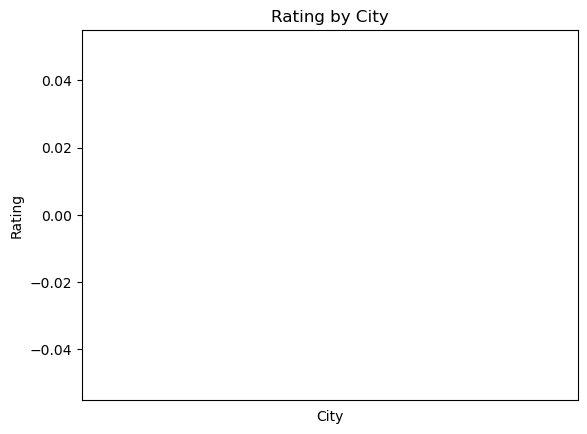

<Figure size 1500x800 with 0 Axes>

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('DataRestaurants.csv')

# Define the cities you want to include in the bar plot
cities = ['1180 Uccle', '1060 Saint-Gilles', '1000 Bruxelles', '1150 Woluwe-Saint-Pierre', '1140 Evere', '1170 Watermael-Boitsfort', '1020 Laeken', '1160 Auderghem', '1083 Ganshoren','1050 Ixelles',' 1081 Koekelberg','1080 Molenbeek-Saint-Jean','1190 Forest','1090 Jette','1030 Schaerbeek']

# Filter the DataFrame to include only the desired cities
filtered_df = df[df['Address'].isin(cities)]

# Create the bar plot
plt.bar(filtered_df['Address'], filtered_df['Rating'])

# Customize the x-axis labels based on a column in the DataFrame
plt.xticks(filtered_df['Address'], filtered_df['Address'])

# Add labels and title to the plot
plt.xlabel('City')
plt.ylabel('Rating')
plt.title('Rating by City')

plt.figure(figsize=(15, 8))  # Adjust the width and height as needed
plt.show()



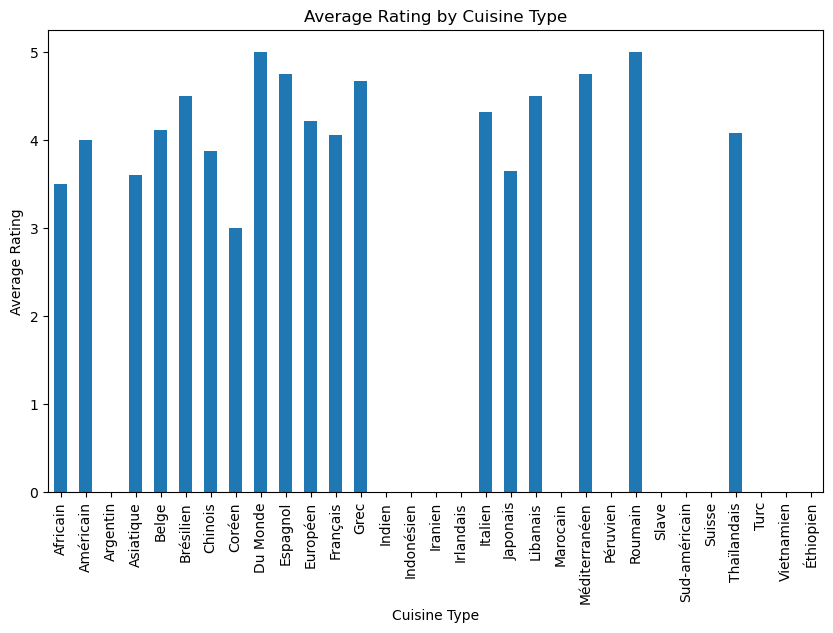

In [42]:
# Remove non-numeric characters from the 'Rating' column
combined_df['Rating'] = combined_df['Rating'].str.replace('[^0-9.]', '', regex=True)

# Convert the 'Rating' column to numeric type
combined_df['Rating'] = pd.to_numeric(combined_df['Rating'], errors='coerce')

# Group the data by cuisine type and calculate the average rating
average_rating_by_cuisine = combined_df.groupby('Type')['Rating'].mean()

# Create a bar plot
average_rating_by_cuisine.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.title('Average Rating by Cuisine Type')
plt.show()


In [66]:
print(combined_df.dtypes)



Name                 object
Rating              float64
Type                 object
Address              object
Average budget       object
Maximum capacity     object
Latitude            float64
Longitude           float64
dtype: object


In [67]:
print(combined_df['Rating'].unique())


[5.         0.         4.75       4.83333333 4.5        4.25
 4.3        4.16666667 4.125      4.         3.75       3.83333333
 3.625      3.5        3.33333333 3.         2.25       2.
 1.         0.5       ]


In [52]:
combined_df['Rating'] = combined_df['Rating'].fillna(0)  # Fill missing values with 0
combined_df['Rating'] = pd.to_numeric(combined_df['Rating'], errors='coerce')  # Convert to numeric type


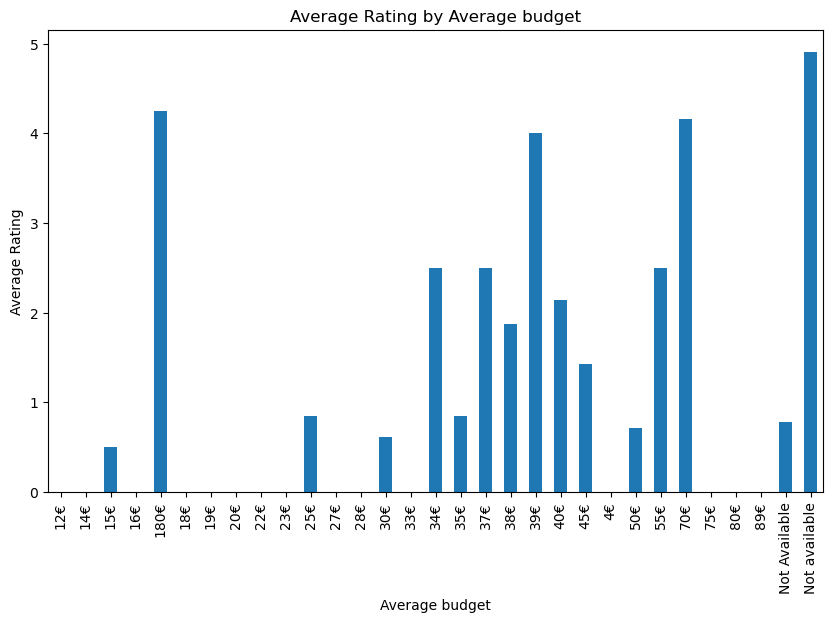

In [53]:
average_rating_by_cuisine = combined_df.groupby('Average budget')['Rating'].mean()

average_rating_by_cuisine.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Average budget')
plt.ylabel('Average Rating')
plt.title('Average Rating by Average budget')
plt.show()
